In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import scipy as sp
import sys
from scipy import stats

In [7]:
df = pd.read_excel('54_serial_interval_data.xlsx')

In [9]:
data = df.serial_interval.values
data.sort()
data = data[1:]

In [8]:
n_boot = 10000
values = np.zeros((3,n_boot,200))
params = np.zeros((3,n_boot,3))
for i in tqdm(range(n_boot)):
    data_boot = np.random.choice(data,replace=True,size=data.shape[0])
    params[0,i,:] = stats.gamma.fit(data_boot,floc=-14)
    values[0,i,:] = stats.gamma.pdf(np.linspace(-5,20,200),*params[0,i,:])
    params[1,i,:] = stats.lognorm.fit(data_boot,floc=-14)
    values[1,i,:] = stats.lognorm.pdf(np.linspace(-5,20,200),*params[1,i,:])
    params[2,i,:] = stats.weibull_min.fit(data_boot,floc=-14)
    values[2,i,:] = stats.weibull_min.pdf(np.linspace(-5,20,200),*params[2,i,:])

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:02<00:00, 54.74it/s]


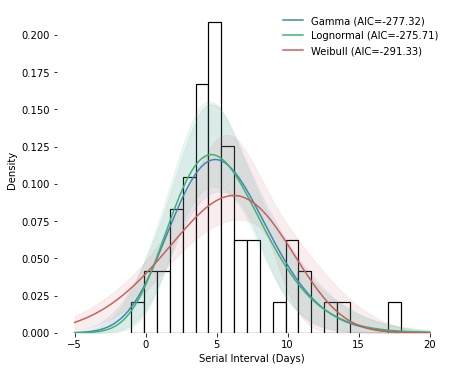

In [11]:
plt.figure(figsize=(7,6))
loglik= -np.sum(stats.gamma.logpdf(data,*stats.gamma.fit(data,floc=-14)))
plt.plot(np.linspace(-5,20,200),stats.gamma.pdf(np.linspace(-5,20,200),*stats.gamma.fit(data,floc=-14)),color='steelblue',label=f'Gamma (AIC={4-2*loglik:0.2f})')
plt.fill_between(np.linspace(-5,20,200),np.quantile(values[0,:,:],0.025,axis=0),np.quantile(values[0,:,:],0.975,axis=0),alpha=0.1,color='steelblue')
#plt.plot(np.linspace(-5,20,200),np.quantile(values[0,:,:],0.025,axis=0),color='steelblue',linestyle='dotted')
#plt.plot(np.linspace(-5,20,200),np.quantile(values[0,:,:],0.975,axis=0),color='steelblue',linestyle='dotted')


loglik= -np.sum(stats.lognorm.logpdf(data,*stats.lognorm.fit(data,floc=-14)))
plt.plot(np.linspace(-5,20,200),stats.lognorm.pdf(np.linspace(-5,20,200),*stats.lognorm.fit(data,floc=-14)),color='mediumseagreen',label=f'Lognormal (AIC={4-2*loglik:0.2f})')
plt.fill_between(np.linspace(-5,20,200),np.quantile(values[1,:,:],0.025,axis=0),np.quantile(values[1,:,:],0.975,axis=0),alpha=0.1,color='mediumseagreen')
#plt.plot(np.linspace(-5,20,200),np.quantile(values[1,:,:],0.025,axis=0),color='mediumseagreen',linestyle='dotted')
#plt.plot(np.linspace(-5,20,200),np.quantile(values[1,:,:],0.975,axis=0),color='mediumseagreen',linestyle='dotted')

loglik= -np.sum(stats.weibull_min.logpdf(data,*stats.weibull_min.fit(data,floc=-14)))
plt.plot(np.linspace(-5,20,200),stats.weibull_min.pdf(np.linspace(-5,20,200),*stats.weibull_min.fit(data,floc=-14)),color='indianred',label=f'Weibull (AIC={4-2*loglik:0.2f})')
plt.fill_between(np.linspace(-5,20,200),np.quantile(values[2,:,:],0.025,axis=0),np.quantile(values[2,:,:],0.975,axis=0),alpha=0.1,color='indianred')

plt.hist(data,density=True,bins=21,zorder=-1,edgecolor='black',linewidth=1.2,color='w')

plt.legend(frameon=False)
plt.box(False)
plt.xlabel("Serial Interval (Days)")
plt.ylabel("Density")
plt.savefig('Figures/outputs/SI_from-14.png',dpi=300)
plt.show()

In [12]:
temp_gamma = []
temp_lognorm = []
temp_weibull = []

temp_gamma.append((stats.gamma(*stats.gamma.fit(data,floc=-14)).mean(),stats.gamma(*stats.gamma.fit(data,floc=-14)).std(),stats.gamma(*stats.gamma.fit(data,floc=-14)).median(),np.abs(np.subtract(*stats.gamma(*stats.gamma.fit(data,floc=-14)).interval(0.5)))))
temp_lognorm.append((stats.lognorm(*stats.lognorm.fit(data,floc=-14)).mean(),stats.lognorm(*stats.lognorm.fit(data,floc=-14)).std(),stats.lognorm(*stats.lognorm.fit(data,floc=-14)).median(),np.abs(np.subtract(*stats.lognorm(*stats.lognorm.fit(data,floc=-14)).interval(0.5)))))
temp_weibull.append((stats.weibull_min(*stats.weibull_min.fit(data,floc=-14)).mean(),stats.weibull_min(*stats.weibull_min.fit(data,floc=-14)).std(),stats.weibull_min(*stats.weibull_min.fit(data,floc=-14)).median(),np.abs(np.subtract(*stats.weibull_min(*stats.weibull_min.fit(data,floc=-14)).interval(0.5)))))
for i in tqdm(range(n_boot)):
    temp_gamma.append((stats.gamma(*params[0,i,:]).mean(),stats.gamma(*params[0,i,:]).std(),stats.gamma(*params[0,i,:]).median(),np.abs(np.subtract(*stats.gamma(*params[0,i,:]).interval(0.5)))))
    temp_weibull.append((stats.weibull_min(*params[2,i,:]).mean(),stats.weibull_min(*params[2,i,:]).std(),stats.weibull_min(*params[2,i,:]).median(),np.abs(np.subtract(*stats.weibull_min(*params[2,i,:]).interval(0.5)))))
    temp_lognorm.append((stats.lognorm(*params[1,i,:]).mean(),stats.lognorm(*params[1,i,:]).std(),stats.lognorm(*params[1,i,:]).median(),np.abs(np.subtract(*stats.lognorm(*params[1,i,:]).interval(0.5)))))    
temp_gamma = np.array(temp_gamma)
temp_weibull = np.array(temp_weibull)
temp_lognorm = np.array(temp_lognorm)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:50<00:00, 58.80it/s]


In [13]:
qs_gamma = np.quantile(temp_gamma[1:,:],[0.025,0.975],axis=0)
qs_lognorm = np.quantile(temp_lognorm[1:,:],[0.025,0.975],axis=0)
qs_weibull = np.quantile(temp_weibull[1:,:],[0.025,0.975],axis=0)

In [14]:
with open('outputs/SI_from-14.csv','w') as f:
    print("Distribution,Mean,Standard Deviation,Median,IQR,AIC",file = f)
    print(f"Gamma,{temp_gamma[0,0]:0.3f} ({qs_gamma[0,0]:0.3f}-{qs_gamma[1,0]:0.3f})",end='',file = f)
    for i in range(1,4):
        print(f",{temp_gamma[0,i]:0.3f} ({qs_gamma[0,i]:0.3f}-{qs_gamma[1,i]:0.3f})",end='',file = f)
    loglik= -np.sum(stats.gamma.logpdf(data,*stats.gamma.fit(data,floc=-14)))
    print(f"{4-2*loglik:0.2f}",file = f)
    print(f"Lognormal,{temp_lognorm[0,0]:0.3f} ({qs_lognorm[0,0]:0.3f}-{qs_lognorm[1,0]:0.3f})",end='',file = f)
    for i in range(1,4):
        print(f",{temp_lognorm[0,i]:0.3f} ({qs_lognorm[0,i]:0.3f}-{qs_lognorm[1,i]:0.3f})",end='',file = f)
    loglik= -np.sum(stats.lognorm.logpdf(data,*stats.lognorm.fit(data,floc=-14)))
    print(f"{4-2*loglik:0.2f}",file = f)
    print(f"Weibull,{temp_weibull[0,0]:0.3f} ({qs_weibull[0,0]:0.3f}-{qs_weibull[1,0]:0.3f})",end='',file = f)
    for i in range(1,4):
        print(f",{temp_weibull[0,i]:0.3f} ({qs_weibull[0,i]:0.3f}-{qs_weibull[1,i]:0.3f})",end='',file = f)
    loglik= -np.sum(stats.weibull_min.logpdf(data,*stats.weibull_min.fit(data,floc=-14)))
    print(f"{4-2*loglik:0.2f}",file = f)

In [15]:
pd.DataFrame(params[0,:,:],columns=['alpha','loc','beta'])[['alpha','beta']].describe(percentiles=[0.025,0.25,0.50,0.75,0.975]).loc[['mean','std','50%','25%','75%','2.5%','97.5%']].T.to_csv('outputs/SI_from-14_gamma.csv')
pd.DataFrame(params[1,:,:],columns=['shape','loc','scale'])[['shape','scale']].describe(percentiles=[0.025,0.25,0.50,0.75,0.975]).loc[['mean','std','50%','25%','75%','2.5%','97.5%']].T.to_csv('outputs/SI_from-14_lognormal.csv')
pd.DataFrame(params[2,:,:],columns=['shape','loc','scale'])[['shape','scale']].describe(percentiles=[0.025,0.25,0.50,0.75,0.975]).loc[['mean','std','50%','25%','75%','2.5%','97.5%']].T.to_csv('outputs/SI_from-14_weibull.csv')

In [16]:
n_boot = 10000
values = np.zeros((3,n_boot,200))
params = np.zeros((3,n_boot,3))
for i in tqdm(range(n_boot)):
    data_boot = np.random.choice(data[data>0],replace=True,size=data[data>0].shape[0])
    params[0,i,:] = stats.gamma.fit(data_boot,floc=0)
    values[0,i,:] = stats.gamma.pdf(np.linspace(-5,20,200),*params[0,i,:])
    params[1,i,:] = stats.lognorm.fit(data_boot,floc=0)
    values[1,i,:] = stats.lognorm.pdf(np.linspace(-5,20,200),*params[1,i,:])
    params[2,i,:] = stats.weibull_min.fit(data_boot,floc=0)
    values[2,i,:] = stats.weibull_min.pdf(np.linspace(-5,20,200),*params[2,i,:])

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:58<00:00, 55.96it/s]


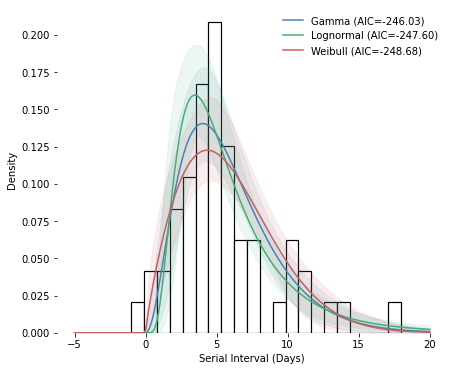

In [17]:
plt.figure(figsize=(7,6))
loglik= -np.sum(stats.gamma.logpdf(data[data>0],*stats.gamma.fit(data[data>0],floc=0)))
plt.plot(np.linspace(-5,20,200),stats.gamma.pdf(np.linspace(-5,20,200),*stats.gamma.fit(data[data>0],floc=0)),color='steelblue',label=f'Gamma (AIC={4-2*loglik:0.2f})')
plt.fill_between(np.linspace(-5,20,200),np.quantile(values[0,:,:],0.025,axis=0),np.quantile(values[0,:,:],0.975,axis=0),alpha=0.1,color='steelblue')

loglik= -np.sum(stats.lognorm.logpdf(data[data>0],*stats.lognorm.fit(data[data>0],floc=0)))
plt.plot(np.linspace(-5,20,200),stats.lognorm.pdf(np.linspace(-5,20,200),*stats.lognorm.fit(data[data>0],floc=0)),color='mediumseagreen',label=f'Lognormal (AIC={4-2*loglik:0.2f})')
plt.fill_between(np.linspace(-5,20,200),np.quantile(values[1,:,:],0.025,axis=0),np.quantile(values[1,:,:],0.975,axis=0),alpha=0.1,color='mediumseagreen')

loglik= -np.sum(stats.weibull_min.logpdf(data[data>0],*stats.weibull_min.fit(data[data>0],floc=0)))
plt.plot(np.linspace(-5,20,200),stats.weibull_min.pdf(np.linspace(-5,20,200),*stats.weibull_min.fit(data[data>0],floc=0)),color='indianred',label=f'Weibull (AIC={4-2*loglik:0.2f})')
plt.fill_between(np.linspace(-5,20,200),np.quantile(values[2,:,:],0.025,axis=0),np.quantile(values[2,:,:],0.975,axis=0),alpha=0.1,color='indianred')

plt.hist(data,density=True,bins=21,zorder=-1,edgecolor='black',linewidth=1.2,color='w')

plt.legend(frameon=False)
plt.box(False)
plt.xlabel("Serial Interval (Days)")
plt.ylabel("Density")
plt.savefig('Figures/outputs/SI_from0.png',dpi=300)
plt.show()

In [20]:
temp_gamma = []
temp_lognorm = []
temp_weibull = []

temp_gamma.append((stats.gamma(*stats.gamma.fit(data[data>0],floc=0)).mean(),stats.gamma(*stats.gamma.fit(data[data>0],floc=0)).std(),stats.gamma(*stats.gamma.fit(data[data>0],floc=0)).median(),np.abs(np.subtract(*stats.gamma(*stats.gamma.fit(data[data>0],floc=0)).interval(0.5)))))
temp_lognorm.append((stats.lognorm(*stats.lognorm.fit(data[data>0],floc=0)).mean(),stats.lognorm(*stats.lognorm.fit(data[data>0],floc=0)).std(),stats.lognorm(*stats.lognorm.fit(data[data>0],floc=0)).median(),np.abs(np.subtract(*stats.lognorm(*stats.lognorm.fit(data[data>0],floc=0)).interval(0.5)))))
temp_weibull.append((stats.weibull_min(*stats.weibull_min.fit(data[data>0],floc=0)).mean(),stats.weibull_min(*stats.weibull_min.fit(data[data>0],floc=0)).std(),stats.weibull_min(*stats.weibull_min.fit(data[data>0],floc=0)).median(),np.abs(np.subtract(*stats.weibull_min(*stats.weibull_min.fit(data[data>0],floc=0)).interval(0.5)))))
for i in tqdm(range(n_boot)):
    temp_gamma.append((stats.gamma(*params[0,i,:]).mean(),stats.gamma(*params[0,i,:]).std(),stats.gamma(*params[0,i,:]).median(),np.abs(np.subtract(*stats.gamma(*params[0,i,:]).interval(0.5)))))
    temp_weibull.append((stats.weibull_min(*params[2,i,:]).mean(),stats.weibull_min(*params[2,i,:]).std(),stats.weibull_min(*params[2,i,:]).median(),np.abs(np.subtract(*stats.weibull_min(*params[2,i,:]).interval(0.5)))))
    temp_lognorm.append((stats.lognorm(*params[1,i,:]).mean(),stats.lognorm(*params[1,i,:]).std(),stats.lognorm(*params[1,i,:]).median(),np.abs(np.subtract(*stats.lognorm(*params[1,i,:]).interval(0.5)))))    
temp_gamma = np.array(temp_gamma)
temp_weibull = np.array(temp_weibull)
temp_lognorm = np.array(temp_lognorm)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:38<00:00, 45.77it/s]


In [21]:
qs_gamma = np.quantile(temp_gamma[1:,:],[0.025,0.975],axis=0)
qs_lognorm = np.quantile(temp_lognorm[1:,:],[0.025,0.975],axis=0)
qs_weibull = np.quantile(temp_weibull[1:,:],[0.025,0.975],axis=0)

In [22]:
with open('outputs/SI_from0.csv','w') as f:
    print("Distribution,Mean,Standard Deviation,Median,IQR,AIC",file = f)
    print(f"Gamma,{temp_gamma[0,0]:0.3f} ({qs_gamma[0,0]:0.3f}-{qs_gamma[1,0]:0.3f})",end='',file = f)
    for i in range(1,4):
        print(f",{temp_gamma[0,i]:0.3f} ({qs_gamma[0,i]:0.3f}-{qs_gamma[1,i]:0.3f})",end='',file = f)
    loglik= -np.sum(stats.gamma.logpdf(data[data>0],*stats.gamma.fit(data[data>0],floc=0)))
    print(f"{4-2*loglik:0.2f}",file = f)
    print(f"Lognormal,{temp_lognorm[0,0]:0.3f} ({qs_lognorm[0,0]:0.3f}-{qs_lognorm[1,0]:0.3f})",end='',file = f)
    for i in range(1,4):
        print(f",{temp_lognorm[0,i]:0.3f} ({qs_lognorm[0,i]:0.3f}-{qs_lognorm[1,i]:0.3f})",end='',file = f)
    loglik= -np.sum(stats.lognorm.logpdf(data[data>0],*stats.lognorm.fit(data[data>0],floc=0)))
    print(f"{4-2*loglik:0.2f}",file = f)
    print(f"Weibull,{temp_weibull[0,0]:0.3f} ({qs_weibull[0,0]:0.3f}-{qs_weibull[1,0]:0.3f})",end='',file = f)
    for i in range(1,4):
        print(f",{temp_weibull[0,i]:0.3f} ({qs_weibull[0,i]:0.3f}-{qs_weibull[1,i]:0.3f})",end='',file = f)
    loglik= -np.sum(stats.weibull_min.logpdf(data[data>0],*stats.weibull_min.fit(data[data>0],floc=0)))
    print(f"{4-2*loglik:0.2f}",file = f)

In [160]:
pd.DataFrame(params[0,:,:],columns=['alpha','loc','beta'])[['alpha','beta']].describe(percentiles=[0.025,0.25,0.75,0.975]).loc[['mean','std','25%','75%','2.5%','97.5%']].T.to_csv('outputs/SI_from0_gamma.csv')
pd.DataFrame(params[1,:,:],columns=['shape','loc','scale'])[['shape','scale']].describe(percentiles=[0.025,0.25,0.75,0.975]).loc[['mean','std','25%','75%','2.5%','97.5%']].T.to_csv('outputs/SI_from0_lognormal.csv')
pd.DataFrame(params[2,:,:],columns=['shape','loc','scale'])[['shape','scale']].describe(percentiles=[0.025,0.25,0.75,0.975]).loc[['mean','std','25%','75%','2.5%','97.5%']].T.to_csv('outputs/SI_from0_weibull.csv')